# Employment Recognition Problem

Working on Employment Type dataset where the aim to predict the TravelInsurance of employees based on different factors that rely on their conditions; it could either be 1 or 0.

**Proposed algorithms for this dataset:-** 
1. K-nearest neighbors, 
2. Random Forest Classifier 
3. Decision Tree Classifier.

#### Importing required libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, log_loss, roc_curve
import matplotlib.pyplot as plt 
import tensorflow.keras as keras
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

### Loading DataSet

In [3]:
#provide path of dataset here
path = '/content/drive/MyDrive/ML_PROJECT/TIP.csv'

In [5]:
ls

 Volume in drive E is New Volume
 Volume Serial Number is 90C4-2A5E

 Directory of E:\6.Project's\Freelancer

10-08-2022  18:24    <DIR>          .
10-08-2022  18:24    <DIR>          ..
05-08-2022  23:17    <DIR>          .ipynb_checkpoints
10-08-2022  18:24           598,012 Basic ML - Project Final.ipynb
10-08-2022  17:51            23,590 E_Insurance.docx
05-08-2022  22:36           504,686 Fetal health.ipynb
05-08-2022  22:30            45,485 Fetal-Health-Classification-main.zip
07-08-2022  08:28            23,358 Implicit-data-based-recommendation-system-master.zip
06-08-2022  00:41           477,228 Letter Recognition.ipynb
05-08-2022  22:30           204,955 Letter-Recognition-main.zip
08-08-2022  10:41    <DIR>          Project's
09-08-2022  22:05    <DIR>          Report's
23-11-2021  22:36    <DIR>          YouTube Material
               7 File(s)      1,877,314 bytes
               6 Dir(s)  345,847,881,728 bytes free


In [4]:
tip_df = pd.read_csv("TIP.csv")
tip_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'TIP.csv'

### Understaning Data
Let's have some basic information about the Employment type dataset.

#### Exploratory Data Analysis (EDA)

In [5]:
tip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


Above cell represents the attribute information resides in the dataset to analyze the null presence and dtype of each attribute.

In [6]:
#another way for checking if there resides any null value in the dataset
tip_df.any().isnull()

Unnamed: 0             False
Age                    False
Employment Type        False
GraduateOrNot          False
AnnualIncome           False
FamilyMembers          False
ChronicDiseases        False
FrequentFlyer          False
EverTravelledAbroad    False
TravelInsurance        False
dtype: bool

False value represents no presence of null vlaue in a column. Therefore, it can be stated that the data is null-free.

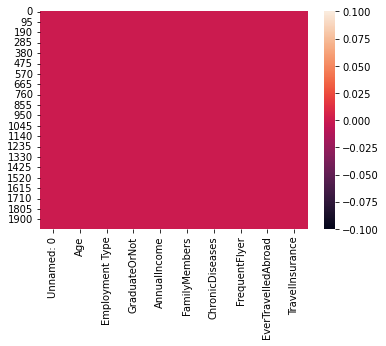

In [7]:
#nan value through visual plot
sns.heatmap(tip_df.isna())

##### Checking the number of unique values.

In [8]:
def show_objects(df):
    cols = df.select_dtypes(include=['object']).columns
    for col in cols:
        print("Unique values for {}".format(col))
        print(df.loc[:, col].unique())
    
show_objects(tip_df)

Unique values for Employment Type
['Government Sector' 'Private Sector/Self Employed']
Unique values for GraduateOrNot
['Yes' 'No']
Unique values for FrequentFlyer
['No' 'Yes']
Unique values for EverTravelledAbroad
['No' 'Yes']


Unique values from each column has been exracted and shown above. The columns with dtype Object carry two unique values.


##### Now, let's have some statical info about the dataset we are working upon# 

In [9]:
tip_df.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


A brief description about Employment Recognition dataset shown above describes the equal value count of each column i.e., 1987. Therefore, the dataset doesn't have any na values.

Let's explore some features of dataset to have some predictive knowledge. 

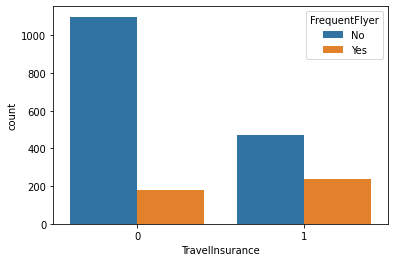

In [10]:
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(hue='FrequentFlyer',x='TravelInsurance',data=tip_df)
plt.show()

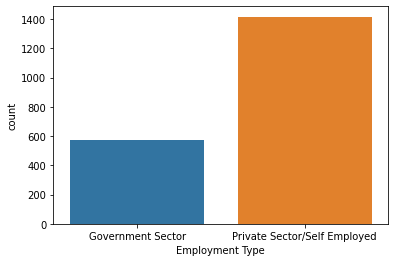

In [11]:
sns.countplot(tip_df['Employment Type'])

The employees belonging to private or self employeed sector are much more in number as compared to government sector emplyees.

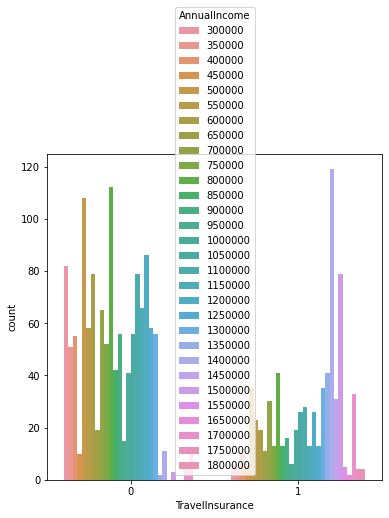

In [12]:
fig, ax = plt.subplots(figsize=(6,6))
sns.countplot(hue='AnnualIncome',x='TravelInsurance',data=tip_df)
plt.show()

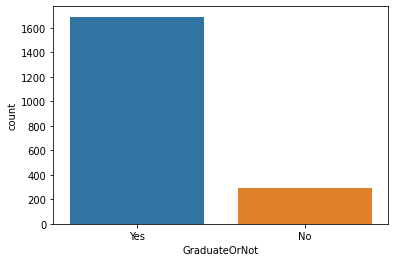

In [13]:
sns.countplot(tip_df['GraduateOrNot'])

There seen a more number of employees that are already graduated.

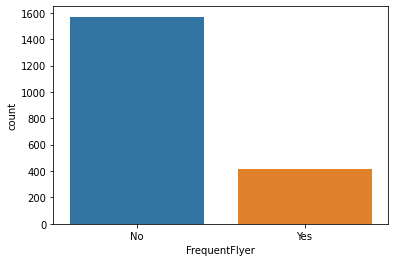

In [14]:
sns.countplot(tip_df['FrequentFlyer'])

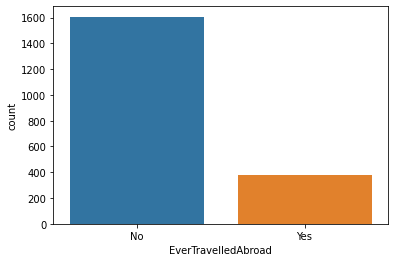

In [15]:
sns.countplot(tip_df['EverTravelledAbroad'])

The least number of employees have been found travelled Abroad during their life. More number of employeed are found un-travelled Abroad ever.

In [16]:
#function to encode object type attributes.
def encoder(row):
    obj_cols = tip_df.select_dtypes(include=['object']).columns
    if row.dtypes == "object":
        return LabelEncoder().fit_transform(row)
    return row

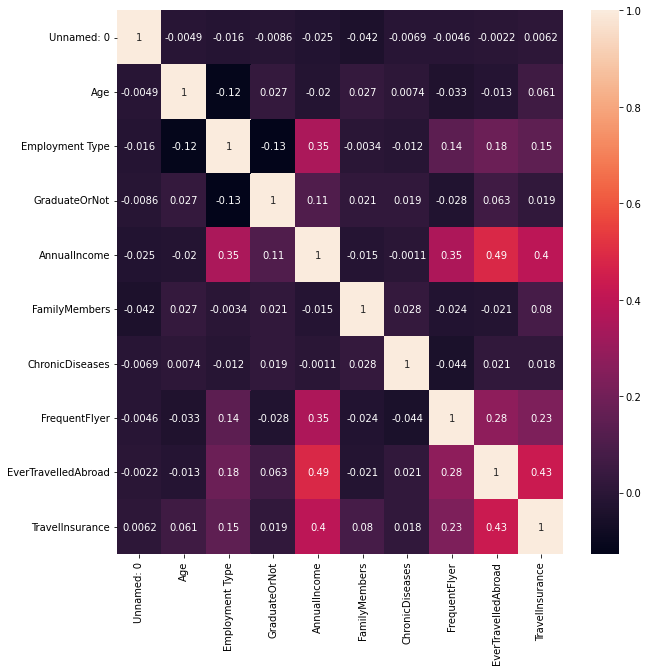

In [17]:
#feature correlation matrix using Pearson heatmap
corr = tip_df.apply(encoder).corr()
g = sns.heatmap(corr,annot=True)
g.figure.set_size_inches(10,10)

In [18]:
tip_df['Employment Type'] = LabelEncoder().fit_transform(tip_df['Employment Type'])
tip_df['FrequentFlyer'] = LabelEncoder().fit_transform(tip_df['FrequentFlyer'])
tip_df['GraduateOrNot'] = LabelEncoder().fit_transform(tip_df['GraduateOrNot'])
tip_df['EverTravelledAbroad'] = LabelEncoder().fit_transform(tip_df['EverTravelledAbroad'])
tip_df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,0,1,400000,6,1,0,0,0
1,1,31,1,1,1250000,7,0,0,0,0
2,2,34,1,1,500000,4,1,0,0,1
3,3,28,1,1,700000,3,1,0,0,0
4,4,28,1,1,700000,8,1,1,0,0


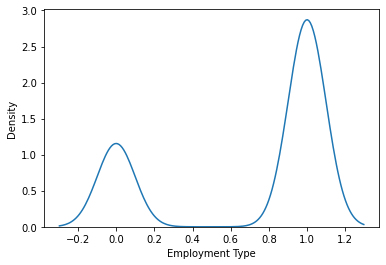

In [19]:
#distribution plot using kde plot
sns.kdeplot(x = tip_df['Employment Type'])

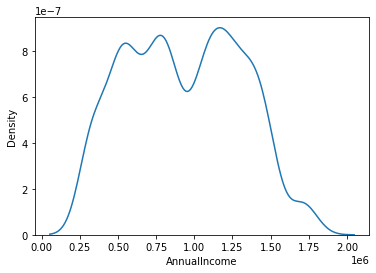

In [20]:
sns.kdeplot(x = tip_df['AnnualIncome'])

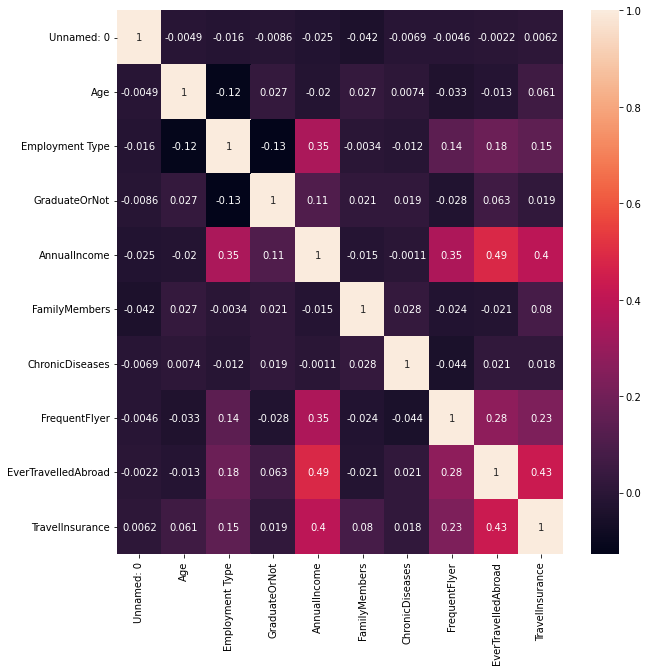

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(tip_df.corr(), annot=True)


### Data Preprocessing
It is needed to inhance accuracy

In [22]:
#Preparing the dataset for applying in the model
target = 'TravelInsurance'
#Splitting the dataset into training and validation data
X = tip_df.drop(target, axis=1)
Y = tip_df[target]
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, random_state=101, test_size=0.3)

#Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

#Feature reduction
pca = PCA()
pca = pca.fit(X_train, Y_train)

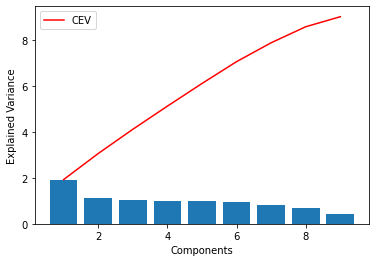

In [23]:
plt.bar(range(1,len(pca.explained_variance_)+1),pca.explained_variance_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_)+1), np.cumsum(pca.explained_variance_), c='red', label='CEV')
plt.legend(loc='upper left')
plt.show()

In [24]:
#feature transformation using Pca reduction technique
X_train = pca.transform(X_train)
X_val = pca.transform(X_val)

### Model1: K Nearest Neighbors Classifier

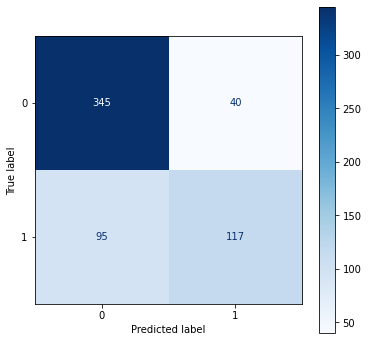

In [25]:
#Applying the K-nearest neighbor algorithm
model_knn = KNeighborsClassifier(n_neighbors=7)
model_knn.fit(X_train, Y_train)
prediction = model_knn.predict(X_val)

fig, ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(model_knn, X_val, Y_val, ax=ax, cmap='Blues')

#### Performance

Above confusion matrix shows some true positives as well as false positive values.

Some other performance measures for KNN classifier

In [26]:
log_loss(Y_val, model_knn.predict_proba(X_val))

1.746370594595393

In [27]:
print('------------Classification report--------------- ')
print(classification_report(Y_val, prediction))
acc_knn = accuracy_score(Y_val, prediction)
f1_knn = f1_score(Y_val, prediction, average='macro')
print("f1-score: ", f1_knn)

------------Classification report--------------- 
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       385
           1       0.75      0.55      0.63       212

    accuracy                           0.77       597
   macro avg       0.76      0.72      0.74       597
weighted avg       0.77      0.77      0.76       597

f1-score:  0.7352549889135254


This model is showing 0.99 score in classification with the accuracy of 1.00

### KNN with HyperParameter Tuning

In [28]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors':[6,8,10,12,14,16,18,20],
         'leaf_size':list(range(1,50,5))}

#tuner
gs = GridSearchCV(knn, param_grid= parameters, cv = 5,scoring = "accuracy",verbose=1)
gs.fit(X_train, Y_train)

print(gs.best_score_)
print(gs.best_estimator_)
print(gs.best_params_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
0.7863309352517985
KNeighborsClassifier(leaf_size=1, n_neighbors=8)
{'leaf_size': 1, 'n_neighbors': 8}


#### Performance

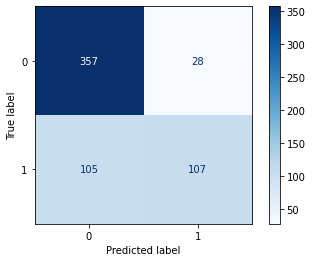

In [29]:
plot_confusion_matrix(gs, X_val, Y_val,cmap='Blues')

In [30]:
log_loss(Y_val, gs.predict_proba(X_val))

1.5818238036583445

In [31]:
print('------------Classification report--------------- ')
print(classification_report(Y_val, gs.predict(X_val)))
acc_knn_tuned = (accuracy_score(Y_val, gs.predict(X_val)))
f1_knn_tuned = (accuracy_score(Y_val, gs.predict(X_val)))
print("f1-score: ", f1_knn_tuned)

------------Classification report--------------- 
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       385
           1       0.79      0.50      0.62       212

    accuracy                           0.78       597
   macro avg       0.78      0.72      0.73       597
weighted avg       0.78      0.78      0.76       597

f1-score:  0.7772194304857621


### Model 2: Random forest Classification 

----------------Confusion Matrix-------------------


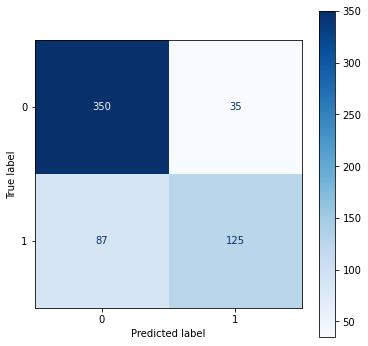

In [32]:
#Applying the Random Forest algorithm
model_rf = RandomForestClassifier(n_estimators=50)
model_rf.fit(X_train, Y_train)
prediction = model_rf.predict(X_val)

print('----------------Confusion Matrix-------------------')
fig, ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(model_rf, X_val, Y_val, ax=ax, cmap='Blues')

#### Performance

In [33]:
log_loss(Y_val, model_rf.predict_proba(X_val))

0.6861910891213847

In [34]:
print('------------Classification report--------------- ')
print(classification_report(Y_val, prediction))
acc_rf = accuracy_score(Y_val, prediction)
f1_rf = f1_score(Y_val, prediction, average='macro')
print("f1-score: ", f1_rf)

------------Classification report--------------- 
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       385
           1       0.78      0.59      0.67       212

    accuracy                           0.80       597
   macro avg       0.79      0.75      0.76       597
weighted avg       0.79      0.80      0.79       597

f1-score:  0.7618122596342516


### RF with HyperParameter Tuning

In [35]:
rf = RandomForestClassifier(random_state=42)
parameters =  {'n_estimators': [10,80],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [4,5,6,7,8],
              'criterion' :['gini', 'entropy']
              }
gs = GridSearchCV(estimator=rf, param_grid=parameters, scoring="accuracy", cv= 5)
gs.fit(X_train, Y_train)

print(gs.best_score_)
print(gs.best_estimator_)
print(gs.best_params_)

0.8129496402877697
RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=80,
                       random_state=42)
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 80}


#### Performance

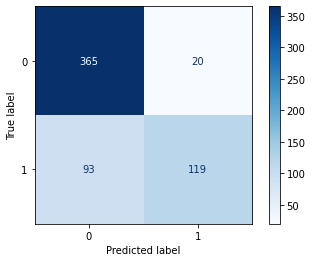

In [36]:
plot_confusion_matrix(gs, X_val, Y_val,cmap='Blues')

In [37]:
log_loss(Y_val, gs.predict_proba(X_val))

0.46126112160905747

In [38]:
print('------------Classification report--------------- ')
print(classification_report(Y_val, gs.predict(X_val)))
acc_rf_tuned = (accuracy_score(Y_val, gs.predict(X_val)))
f1_rf_tuned = (accuracy_score(Y_val, gs.predict(X_val)))
print("f1-score: ", f1_rf_tuned)

------------Classification report--------------- 
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       385
           1       0.86      0.56      0.68       212

    accuracy                           0.81       597
   macro avg       0.83      0.75      0.77       597
weighted avg       0.82      0.81      0.80       597

f1-score:  0.8107202680067002


### Model 3: Decision Tree Classifier

In [39]:
#Instantiating the classifier
model_dt = DecisionTreeClassifier()
#fitting our model with training datasets
model_dt.fit(X_train, Y_train)
prediction = model_dt.predict(X_val)

#### Performance

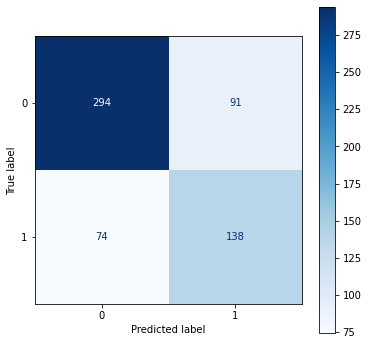

In [40]:
fig, ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(model_dt, X_val, Y_val, ax=ax, cmap='Blues')

In [41]:
print("log-loss: ", log_loss(Y_val, model_dt.predict_proba(X_val)))

log-loss:  9.545892973467778


In [42]:
#Evaluation of result
print("classification report")
print(classification_report(Y_val, prediction))

acc_dt = accuracy_score(Y_val, prediction)
f1_dt = f1_score(Y_val, prediction, average='macro')
print("f1-score: ", f1_dt)

classification report
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       385
           1       0.60      0.65      0.63       212

    accuracy                           0.72       597
   macro avg       0.70      0.71      0.70       597
weighted avg       0.73      0.72      0.73       597

f1-score:  0.7033634170799794


### DT with HyperParameter Tuning

In [43]:
dt = DecisionTreeClassifier(random_state=42)
parameters =  {'max_depth': [2, 3, 5, 10, 20],
              'min_samples_leaf': [5, 10, 20, 50, 80],
              'criterion': ["gini", "entropy"]
              }

gs = GridSearchCV(estimator=dt, param_grid=parameters, scoring="accuracy", cv= 5, verbose=1)
gs.fit(X_train, Y_train)

print(gs.best_score_)
print(gs.best_estimator_)
print(gs.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
0.7884892086330935
DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, random_state=42)
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}


#### Performance

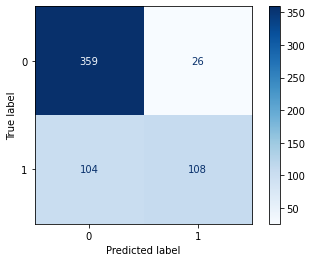

In [44]:
plot_confusion_matrix(gs, X_val, Y_val,cmap='Blues')

In [45]:
log_loss(Y_val, gs.predict_proba(X_val))

0.5004116037087175

In [46]:
print('------------Classification report--------------- ')
print(classification_report(Y_val, gs.predict(X_val)))
acc_dt_tuned = (accuracy_score(Y_val, gs.predict(X_val)))
f1_dt_tuned = (accuracy_score(Y_val, gs.predict(X_val)))
print("f1-score: ", f1_dt_tuned)

------------Classification report--------------- 
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       385
           1       0.81      0.51      0.62       212

    accuracy                           0.78       597
   macro avg       0.79      0.72      0.74       597
weighted avg       0.79      0.78      0.77       597

f1-score:  0.7822445561139029


### Model 4:  ANN (Artifitial Neural Network)

In [61]:
#Applying Artificial neural network
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
ArtificialNeuralNetwork=model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=70, callbacks=[stop_early])

Epoch 1/70
44/44 [==============================] - 1s 6ms/step - loss: 0.6658 - accuracy: 0.6022 - val_loss: 0.6418 - val_accuracy: 0.6600
Epoch 2/70
44/44 [==============================] - 0s 3ms/step - loss: 0.6167 - accuracy: 0.6957 - val_loss: 0.6047 - val_accuracy: 0.7320
Epoch 3/70
44/44 [==============================] - 0s 3ms/step - loss: 0.5776 - accuracy: 0.7547 - val_loss: 0.5716 - val_accuracy: 0.7638
Epoch 4/70
44/44 [==============================] - 0s 3ms/step - loss: 0.5433 - accuracy: 0.7662 - val_loss: 0.5466 - val_accuracy: 0.7672
Epoch 5/70
44/44 [==============================] - 0s 4ms/step - loss: 0.5193 - accuracy: 0.7777 - val_loss: 0.5346 - val_accuracy: 0.7655
Epoch 6/70
44/44 [==============================] - 0s 3ms/step - loss: 0.5081 - accuracy: 0.7806 - val_loss: 0.5276 - val_accuracy: 0.7705
Epoch 7/70
44/44 [==============================] - 0s 4ms/step - loss: 0.5001 - accuracy: 0.7820 - val_loss: 0.5251 - val_accuracy: 0.7722
Epoch 8/70
44/44 [==

### Visualising the training duration of artificial neural network

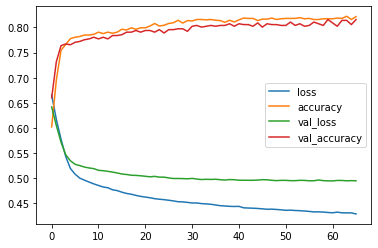

In [62]:
pd.DataFrame(ArtificialNeuralNetwork.history).plot()

Text(0, 0.5, 'accuracy')

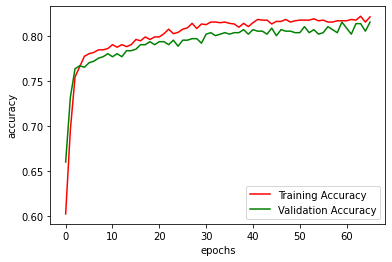

In [63]:
import matplotlib.pyplot as plt

#accuracy
plt.plot(ArtificialNeuralNetwork.history['accuracy'], c='r', label='Training Accuracy')
plt.plot(ArtificialNeuralNetwork.history['val_accuracy'], c='g', label='Validation Accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')

Text(0, 0.5, 'loss')

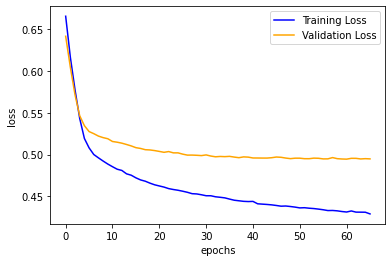

In [65]:
#loss
plt.plot(ArtificialNeuralNetwork.history['loss'], c='b', label='Training Loss')
plt.plot(ArtificialNeuralNetwork.history['val_loss'], c='orange', label='Validation Loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

In [66]:
acc_ann = model.evaluate(X_val, Y_val)[1]
acc_ann

19/19 [==============================] - 0s 1ms/step - loss: 0.4949 - accuracy: 0.8157


0.8157454133033752

In [67]:
pred = []
for i in model.predict(X_val):
  if i > 0.5:
    pred.append(1)
  else:
    pred.append(0)

In [68]:
print('------------Classification report--------------- ')
print(classification_report(Y_val, pred))
acc_ann = (accuracy_score(Y_val, pred))
f1_ann = (f1_score(Y_val, pred))
print("f1-score: ", f1_ann)

------------Classification report--------------- 
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       385
           1       0.87      0.57      0.69       212

    accuracy                           0.82       597
   macro avg       0.83      0.76      0.78       597
weighted avg       0.82      0.82      0.80       597

f1-score:  0.6857142857142856


In [69]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_val, pred))

[[367  18]
 [ 92 120]]


### Comparison of Performance

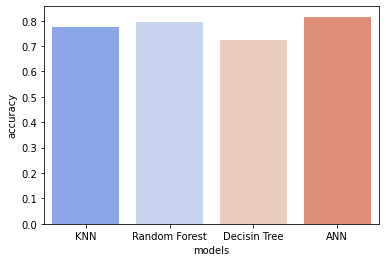


Accuracy Scores: 
--------------------------
KNN :  0.7738693467336684
Random Forest :  0.7956448911222781
Decisin Tree :  0.7236180904522613
ANN :  0.8157453936348409


In [70]:
sns.barplot(['KNN', 'Random Forest', 'Decisin Tree', 'ANN'],
        [acc_knn, acc_rf, acc_dt, acc_ann], palette = 'coolwarm')
plt.xlabel('models')
plt.ylabel('accuracy')
plt.show()

print("\nAccuracy Scores: \n--------------------------")
for model_, acc_model in zip(['KNN', 'Random Forest', 'Decisin Tree', 'ANN'], [acc_knn, acc_rf, acc_dt, acc_ann]):
  print(model_, ": ", acc_model)

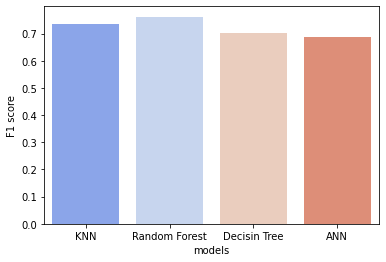


F1 Scores: 
--------------------------
KNN :  0.7352549889135254
Random Forest :  0.7618122596342516
Decisin Tree :  0.7033634170799794
ANN :  0.6857142857142856


In [71]:
sns.barplot(['KNN', 'Random Forest', 'Decisin Tree', 'ANN'],
        [f1_knn, f1_rf, f1_dt, f1_ann], palette = 'coolwarm')
plt.xlabel('models')
plt.ylabel('F1 score')
plt.show()

print("\nF1 Scores: \n--------------------------")
for model_, f1_model in zip(['KNN', 'Random Forest', 'Decisin Tree', 'ANN'], [f1_knn, f1_rf, f1_dt, f1_ann]):
  print(model_, ": ", f1_model)

#### Performance comparison of tuned models

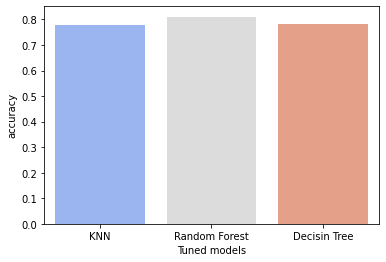


Tuned Accuracy Scores: 
--------------------------
KNN :  0.7738693467336684
Random Forest :  0.7956448911222781
Decisin Tree :  0.7236180904522613


In [72]:
sns.barplot(['KNN', 'Random Forest', 'Decisin Tree'],
        [acc_knn_tuned, acc_rf_tuned, acc_dt_tuned], palette = 'coolwarm')
plt.xlabel('Tuned models')
plt.ylabel('accuracy')
plt.show()

print("\nTuned Accuracy Scores: \n--------------------------")
for model_, acc_model in zip(['KNN', 'Random Forest', 'Decisin Tree'], [acc_knn, acc_rf, acc_dt]):
  print(model_, ": ", acc_model)

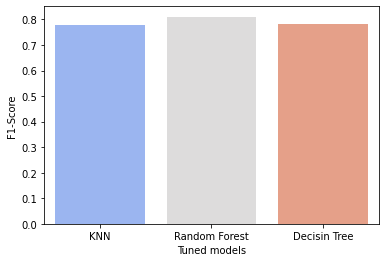


Tuned F1-Scores: 
--------------------------
KNN :  0.7352549889135254
Random Forest :  0.7618122596342516
Decisin Tree :  0.7033634170799794


In [73]:
sns.barplot(['KNN', 'Random Forest', 'Decisin Tree'],
        [f1_knn_tuned, f1_rf_tuned, f1_dt_tuned], palette = 'coolwarm')
plt.xlabel('Tuned models')
plt.ylabel('F1-Score')
plt.show()

print("\nTuned F1-Scores: \n--------------------------")
for model_, f1_model in zip(['KNN', 'Random Forest', 'Decisin Tree'], [f1_knn, f1_rf, f1_dt]):
  print(model_, ": ", f1_model)